## Predict the cost to ship the sculptures

In [1]:
#import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Load the training file
train= pd.read_csv('train.csv')
train.head()

,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Cost
0,fffe3900350033003300,Billy Jenkins,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,No,06/07/15,06/03/15,"New Michelle, OH 50777",-283.29
1,fffe3800330031003900,Jean Bryant,0.28,3.0,3.0,61.0,Brass,6.83,15.00,No,No,No,Roadways,No,Working Class,No,03/06/17,03/05/17,"New Michaelport, WY 12072",-159.96
2,fffe3600370035003100,Laura Miller,0.07,8.0,5.0,237.0,Clay,4.96,21.18,No,No,No,Roadways,Yes,Working Class,Yes,03/09/15,03/08/15,"Bowmanshire, WA 19241",-154.29
3,fffe350031003300,Robert Chaires,0.12,9.0,NaN,NaN,Aluminium,5.81,16.31,No,No,No,NaN,No,Wealthy,Yes,05/24/15,05/20/15,"East Robyn, KY 86375",-161.16
4,fffe3900320038003400,Rosalyn Krol,0.15,17.0,6.0,324.0,Aluminium,3.18,11.94,Yes,Yes,Yes,Airways,No,Working Class,No,12/18/16,12/14/16,"Aprilside, PA 52793",-159.23


In [5]:
#let's check the shape of the training data
train.shape

(6500, 20)

In [6]:
train.info()  # let's get some concise summary of the  train dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6500 entries, 0 to 6499
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer Id            6500 non-null   object 
 1   Artist Name            6500 non-null   object 
 2   Artist Reputation      5750 non-null   float64
 3   Height                 6125 non-null   float64
 4   Width                  5916 non-null   float64
 5   Weight                 5913 non-null   float64
 6   Material               5736 non-null   object 
 7   Price Of Sculpture     6500 non-null   float64
 8   Base Shipping Price    6500 non-null   float64
 9   International          6500 non-null   object 
 10  Express Shipment       6500 non-null   object 
 11  Installation Included  6500 non-null   object 
 12  Transport              5108 non-null   object 
 13  Fragile                6500 non-null   object 
 14  Customer Information   6500 non-null   object 
 15  Remo

In [7]:
train.describe() # Check statistical summary of the train datset

,Artist Reputation,Height,Width,Weight,Price Of Sculpture,Base Shipping Price,Cost
count,5750.000000,6125.000000,5916.000000,5.913000e+03,6500.00000,6500.000000,6.500000e+03
mean,0.461850,21.766204,9.617647,4.006948e+05,1192.42009,37.407174,1.713920e+04
std,0.265781,11.968192,5.417000,2.678081e+06,8819.61675,26.873519,2.406579e+05
min,0.000000,3.000000,2.000000,3.000000e+00,3.00000,10.000000,-8.801727e+05
25%,0.240000,12.000000,6.000000,5.030000e+02,5.23000,16.700000,1.884400e+02
50%,0.450000,20.000000,8.000000,3.102000e+03,8.02500,23.505000,3.820650e+02
75%,0.680000,30.000000,12.000000,3.645600e+04,89.47000,57.905000,1.156115e+03
max,1.000000,73.000000,50.000000,1.179279e+08,382385.67000,99.980000,1.114343e+07


In [8]:
train.corr()  # Checking correlation 

,Artist Reputation,Height,Width,Weight,Price Of Sculpture,Base Shipping Price,Cost
Artist Reputation,1.000000,-0.000513,-0.009203,0.017113,0.054286,-0.011820,0.067368
Height,-0.000513,1.000000,0.768376,0.226543,0.200942,0.353858,0.106047
Width,-0.009203,0.768376,1.000000,0.329603,0.293544,0.332361,0.158159
Weight,0.017113,0.226543,0.329603,1.000000,0.890205,0.150856,0.417263
Price Of Sculpture,0.054286,0.200942,0.293544,0.890205,1.000000,0.134407,0.476231
Base Shipping Price,-0.011820,0.353858,0.332361,0.150856,0.134407,1.000000,0.053068
Cost,0.067368,0.106047,0.158159,0.417263,0.476231,0.053068,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023BAAD71400>,
      dtype=object)

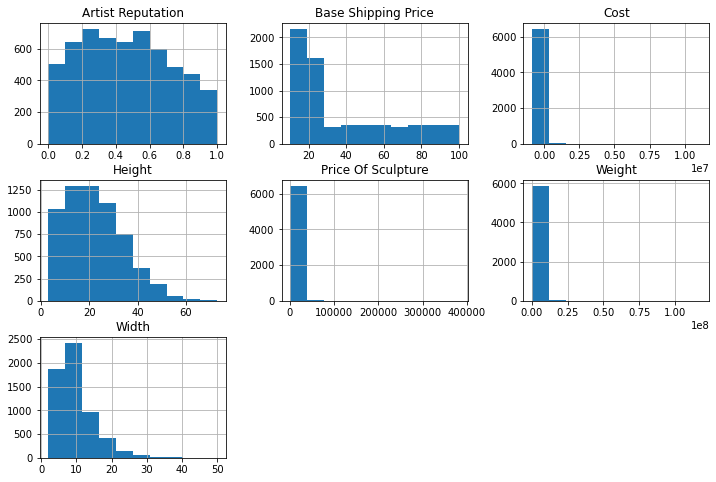

In [11]:
train.hist(figsize=(12,8)) # Histogram for the numerical data

In [12]:
test = pd.read_csv('test.csv')   # Let's also check the test data
test.head()

,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location
0,fffe3400310033003300,James Miller,0.35,53.0,18.0,871.0,Wood,5.98,19.11,Yes,Yes,No,Airways,No,Working Class,No,07/03/17,07/06/17,"Santoshaven, IA 63481"
1,fffe3600350035003400,Karen Vetrano,0.67,7.0,4.0,108.0,Clay,6.92,13.96,No,No,No,Roadways,Yes,Working Class,No,05/02/16,05/02/16,"Ericksonton, OH 98253"
2,fffe3700360030003500,Roseanne Gaona,0.61,6.0,5.0,97.0,Aluminium,4.23,13.62,Yes,No,No,Airways,No,Working Class,No,01/04/18,01/06/18,APO AP 83453
3,fffe350038003600,Todd Almanza,0.14,15.0,8.0,757.0,Clay,6.28,23.79,No,Yes,No,Roadways,Yes,Wealthy,No,09/14/17,09/17/17,"Antonioborough, AL 54778"
4,fffe3500390032003500,Francis Rivero,0.63,10.0,4.0,1673.0,Marble,4.39,17.83,No,Yes,Yes,Roadways,No,Working Class,Yes,12/03/17,12/02/17,"Lake Frances, LA 03040"


In [13]:
test.shape

(3500, 19)

In [14]:
test.isnull().sum()  # Null values present in the test data

Customer Id                0
Artist Name                0
Artist Reputation        222
Height                   119
Width                    141
Weight                   149
Material                   0
Price Of Sculpture         0
Base Shipping Price        0
International              0
Express Shipment           0
Installation Included      0
Transport                232
Fragile                    0
Customer Information       0
Remote Location            0
Scheduled Date             0
Delivery Date              0
Customer Location          0
dtype: int64

## Exploratory Data Analysis

In [15]:
train['Cost'].describe() # we can see some negative values

count    6.500000e+03
mean     1.713920e+04
std      2.406579e+05
min     -8.801727e+05
25%      1.884400e+02
50%      3.820650e+02
75%      1.156115e+03
max      1.114343e+07
Name: Cost, dtype: float64

In [16]:
train['Cost']

0       -283.29
1       -159.96
2       -154.29
3       -161.16
4       -159.23
         ...   
6495     872.43
6496    1347.02
6497     354.55
6498    5037.50
6499     722.47
Name: Cost, Length: 6500, dtype: float64

In [17]:
train['Cost']=train['Cost'].abs()  # let's remove negative values using abs() function

In [18]:
train['Cost']

0        283.29
1        159.96
2        154.29
3        161.16
4        159.23
         ...   
6495     872.43
6496    1347.02
6497     354.55
6498    5037.50
6499     722.47
Name: Cost, Length: 6500, dtype: float64

In [20]:
Cost_per_material= train.groupby('Material')['Cost'].sum()


In [23]:
#plotly iplot -required libraries
import cufflinks as cf
import chart_studio.plotly as py
import plotly.express as px

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objects as go
init_notebook_mode(connected=True)
cf.go_offline()

In [24]:
Cost_per_material.iplot(kind='bar',title='Cost of material per painting',color='yellow')

In [26]:
train['Cost'].iplot(kind='bar',color='maroon')  # Bar plot for Cost - Target 

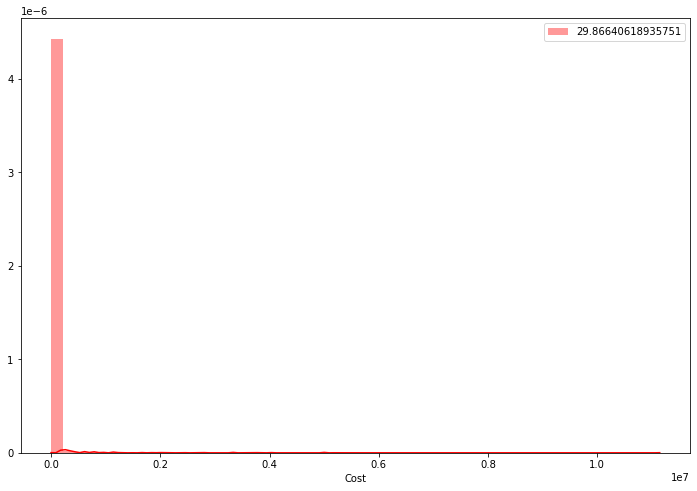

In [29]:
# Plot a distribution plot for 'Cost'
plt.figure(figsize=(12,8))
sns.distplot(train['Cost'],color='red')
plt.legend([train['Cost'].skew()]) 
plt.show()


In [30]:
train['Cost'].iplot(kind='histogram',bins=25,title='Cost histogram',
    xTitle='Cost',
    yTitle='Count')

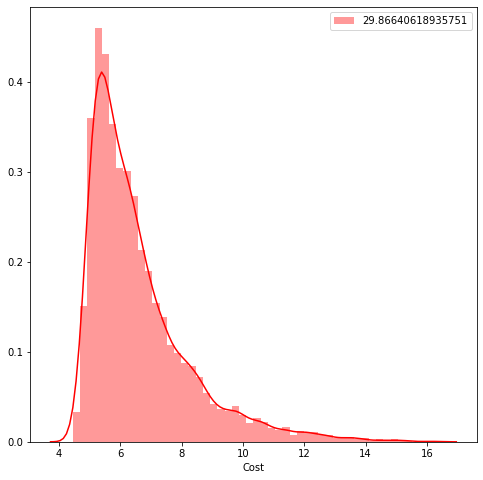

In [31]:
# Transforming into log for "Cost"
plt.figure(figsize=(8,8))
sns.distplot(np.log(train['Cost']),color='red')
plt.legend([train['Cost'].skew()])
plt.show()

In [32]:
np.log(train['Cost']).iplot(kind='histogram',bins=20,xTitle='After log tranformation',yTitle='Count',color='blue')

# Above graph depicts 'Cost' is slightly right skewed

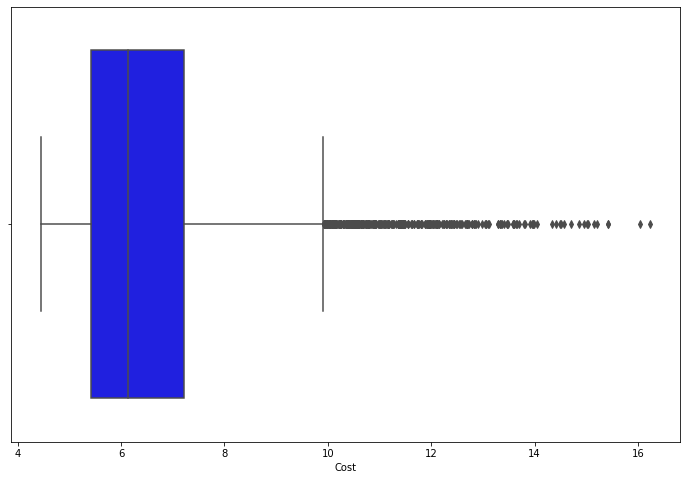

In [33]:
#check for outliers
plt.figure(figsize=(12,8))
sns.boxplot(np.log(train['Cost']),color='blue',)

# # It seems there are many outliers

In [34]:
# Lets check correlation of cost with other numeric features

train.drop(columns='Cost',axis=1).corrwith(train['Cost']).sort_values(ascending=False)

Price Of Sculpture     0.491871
Weight                 0.438959
Width                  0.166999
Height                 0.114737
Artist Reputation      0.071991
Base Shipping Price    0.059591
dtype: float64

### We can see that 'Price Of Sculpture' and 'Weight' has more correlation to our Target variable

In [35]:
# Lets find out for numeric and non-numeric features

object_types= train.select_dtypes(exclude=np.number)
object_types

,Customer Id,Artist Name,Material,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location
0,fffe3900350033003300,Billy Jenkins,Brass,Yes,Yes,No,Airways,No,Working Class,No,06/07/15,06/03/15,"New Michelle, OH 50777"
1,fffe3800330031003900,Jean Bryant,Brass,No,No,No,Roadways,No,Working Class,No,03/06/17,03/05/17,"New Michaelport, WY 12072"
2,fffe3600370035003100,Laura Miller,Clay,No,No,No,Roadways,Yes,Working Class,Yes,03/09/15,03/08/15,"Bowmanshire, WA 19241"
3,fffe350031003300,Robert Chaires,Aluminium,No,No,No,NaN,No,Wealthy,Yes,05/24/15,05/20/15,"East Robyn, KY 86375"
4,fffe3900320038003400,Rosalyn Krol,Aluminium,Yes,Yes,Yes,Airways,No,Working Class,No,12/18/16,12/14/16,"Aprilside, PA 52793"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6495,fffe3800370037003300,Jeffrey Freudenthal,Brass,Yes,Yes,No,Airways,No,Wealthy,Yes,03/28/18,03/25/18,"New Robert, VT 85335"
6496,fffe310036003400,Larry Edwards,NaN,No,No,No,Roadways,No,Working Class,No,08/29/15,08/27/15,"New Joshua, VA 35766"
6497,fffe3600300031003300,Denise Worth,Clay,Yes,No,No,NaN,Yes,Wealthy,No,04/10/19,04/09/19,"Lake Kelly, MA 80823"
6498,fffe3600350035003900,Daniel Drew,Stone,No,Yes,No,Roadways,No,Working Class,Yes,03/10/19,03/12/19,"Hintonberg, UT 35006"


In [36]:
# For numeric columns

num_types= train.select_dtypes(include=np.number)
num_types

,Artist Reputation,Height,Width,Weight,Price Of Sculpture,Base Shipping Price,Cost
0,0.26,17.0,6.0,4128.0,13.91,16.27,283.29
1,0.28,3.0,3.0,61.0,6.83,15.00,159.96
2,0.07,8.0,5.0,237.0,4.96,21.18,154.29
3,0.12,9.0,NaN,NaN,5.81,16.31,161.16
4,0.15,17.0,6.0,324.0,3.18,11.94,159.23
...,...,...,...,...,...,...,...
6495,0.37,37.0,10.0,16551.0,28.28,38.46,872.43
6496,0.67,15.0,NaN,18981.0,67.18,27.72,1347.02
6497,0.68,19.0,8.0,587.0,6.92,10.38,354.55
6498,0.02,33.0,9.0,1269377.0,2929.13,69.76,5037.50


In [37]:
object_types.nunique()

Customer Id              6500
Artist Name              6449
Material                    7
International               2
Express Shipment            2
Installation Included       2
Transport                   3
Fragile                     2
Customer Information        2
Remote Location             2
Scheduled Date           1660
Delivery Date            1664
Customer Location        6500
dtype: int64

# Now need to combine training and test data for further analysis

In [38]:
# Will be adding 'Cost' to Test dataset

test['Cost']='Test'

In [39]:
All_data= train.append(test)

In [40]:
All_data.shape

(10000, 20)

In [41]:
All_data.head()

,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Cost
0,fffe3900350033003300,Billy Jenkins,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,No,06/07/15,06/03/15,"New Michelle, OH 50777",283.29
1,fffe3800330031003900,Jean Bryant,0.28,3.0,3.0,61.0,Brass,6.83,15.00,No,No,No,Roadways,No,Working Class,No,03/06/17,03/05/17,"New Michaelport, WY 12072",159.96
2,fffe3600370035003100,Laura Miller,0.07,8.0,5.0,237.0,Clay,4.96,21.18,No,No,No,Roadways,Yes,Working Class,Yes,03/09/15,03/08/15,"Bowmanshire, WA 19241",154.29
3,fffe350031003300,Robert Chaires,0.12,9.0,NaN,NaN,Aluminium,5.81,16.31,No,No,No,NaN,No,Wealthy,Yes,05/24/15,05/20/15,"East Robyn, KY 86375",161.16
4,fffe3900320038003400,Rosalyn Krol,0.15,17.0,6.0,324.0,Aluminium,3.18,11.94,Yes,Yes,Yes,Airways,No,Working Class,No,12/18/16,12/14/16,"Aprilside, PA 52793",159.23


In [42]:
All_data.tail(5)

,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Cost
3495,fffe3200300037003100,Orlando Miller,0.36,13.0,6.0,23511.0,Marble,78.01,88.70,No,Yes,No,Airways,No,Wealthy,No,02/09/16,02/09/16,"Smithville, IA 22615",Test
3496,fffe390031003100,Javier Loughry,0.72,29.0,14.0,NaN,Bronze,214.85,80.28,Yes,Yes,No,Airways,No,Wealthy,No,11/26/18,11/30/18,"Kennethstad, NE 65012",Test
3497,fffe3200350031003700,Lashawnda Walton,0.59,12.0,6.0,NaN,Brass,8.91,19.58,No,No,Yes,Airways,No,Working Class,No,04/01/17,04/02/17,"Lake Christian, AL 95571",Test
3498,fffe3100380031003000,Rita Battee,NaN,17.0,9.0,565.0,Aluminium,6.75,10.89,No,Yes,Yes,Airways,No,Wealthy,No,06/28/17,06/28/17,"West Regina, UT 49761",Test
3499,fffe3200340037003300,Paul Jones,0.97,25.0,11.0,989903.0,Stone,4768.42,31.38,No,Yes,No,Airways,No,Working Class,No,02/19/19,02/15/19,"Carsonshire, KY 50092",Test


In [43]:
All_data.nunique()

Customer Id              10000
Artist Name               9865
Artist Reputation          101
Height                      66
Width                       42
Weight                    6320
Material                     7
Price Of Sculpture        4813
Base Shipping Price       4744
International                2
Express Shipment             2
Installation Included        2
Transport                    3
Fragile                      2
Customer Information         2
Remote Location              2
Scheduled Date            1697
Delivery Date             1699
Customer Location         9999
Cost                      6317
dtype: int64

In [45]:
#sort data based on Artist Name as Few artist names are repeated and 
#Missing Artistic Reputation value can be filled using ffill after sorting the data
All_data[All_data['Artist Name']=='Nancy Lopez']

,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Cost
709,fffe3100350031003000,Nancy Lopez,NaN,10.0,NaN,110.0,Clay,6.02,11.54,Yes,No,No,NaN,Yes,Working Class,No,05/06/16,05/04/16,"Francoside, ID 05966",131.9
1171,fffe3400310034003900,Nancy Lopez,0.06,33.0,20.0,79196.0,Brass,37.46,30.87,Yes,Yes,Yes,Airways,No,Wealthy,No,03/13/18,03/13/18,"Meltontown, SD 36821",1093.76


In [46]:
#sort and fill nan values
df1 = All_data.sort_values(by='Artist Name',ascending=False)
df1.head()

,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Cost
3353,fffe3800330032003000,Zonia Kidwell,0.29,45.0,8.0,1878399.0,Stone,6973.47,62.20,No,Yes,No,Roadways,No,Wealthy,Yes,09/23/18,09/24/18,"Smithhaven, MI 06785",Test
4979,fffe3600300035003400,Zoila Ingwersen,0.35,29.0,13.0,2100801.0,Stone,3094.46,71.37,No,No,No,Waterways,No,Working Class,No,07/05/15,07/04/15,APO AE 05699,8192.2
3145,fffe3300310036003500,Zoila Goto,0.41,39.0,9.0,526197.0,Marble,2068.01,45.00,No,No,No,Roadways,Yes,Working Class,No,09/09/18,09/13/18,"Paigetown, NE 07010",Test
1412,fffe3200330034003900,Zita Matchett,NaN,7.0,4.0,442.0,Brass,6.34,18.18,No,No,No,Roadways,No,Working Class,No,07/09/16,07/10/16,"West Lindsay, VT 71869",183.41
1308,fffe3700360039003000,Zelma Huang,0.58,27.0,16.0,8109.0,Clay,10.56,40.80,No,Yes,Yes,Airways,Yes,Wealthy,No,03/22/16,03/21/16,"Moorestad, AZ 02653",Test


In [47]:
df1[df1['Artist Name']=='Nancy Lopez']

,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Cost
1171,fffe3400310034003900,Nancy Lopez,0.06,33.0,20.0,79196.0,Brass,37.46,30.87,Yes,Yes,Yes,Airways,No,Wealthy,No,03/13/18,03/13/18,"Meltontown, SD 36821",1093.76
709,fffe3100350031003000,Nancy Lopez,NaN,10.0,NaN,110.0,Clay,6.02,11.54,Yes,No,No,NaN,Yes,Working Class,No,05/06/16,05/04/16,"Francoside, ID 05966",131.9


In [48]:
df1['Artist Reputation'].fillna(method='ffill',inplace = True)
df1[df1['Artist Name']=='Nancy Lopez']

,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Cost
1171,fffe3400310034003900,Nancy Lopez,0.06,33.0,20.0,79196.0,Brass,37.46,30.87,Yes,Yes,Yes,Airways,No,Wealthy,No,03/13/18,03/13/18,"Meltontown, SD 36821",1093.76
709,fffe3100350031003000,Nancy Lopez,0.06,10.0,NaN,110.0,Clay,6.02,11.54,Yes,No,No,NaN,Yes,Working Class,No,05/06/16,05/04/16,"Francoside, ID 05966",131.9


In [64]:
#sort and fill nan values
All_data = df1.sort_index()
All_data.head()

,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Cost
0,fffe3900350033003300,Billy Jenkins,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,No,06/07/15,06/03/15,"New Michelle, OH 50777",283.29
0,fffe3400310033003300,James Miller,0.35,53.0,18.0,871.0,Wood,5.98,19.11,Yes,Yes,No,Airways,No,Working Class,No,07/03/17,07/06/17,"Santoshaven, IA 63481",Test
1,fffe3600350035003400,Karen Vetrano,0.67,7.0,4.0,108.0,Clay,6.92,13.96,No,No,No,Roadways,Yes,Working Class,No,05/02/16,05/02/16,"Ericksonton, OH 98253",Test
1,fffe3800330031003900,Jean Bryant,0.28,3.0,3.0,61.0,Brass,6.83,15.00,No,No,No,Roadways,No,Working Class,No,03/06/17,03/05/17,"New Michaelport, WY 12072",159.96
2,fffe3700360030003500,Roseanne Gaona,0.61,6.0,5.0,97.0,Aluminium,4.23,13.62,Yes,No,No,Airways,No,Working Class,No,01/04/18,01/06/18,APO AP 83453,Test


In [65]:
test_cid = All_data[All_data['Cost'] =='Test']
test_cid

,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Cost
0,fffe3400310033003300,James Miller,0.35,53.0,18.0,871.0,Wood,5.98,19.11,Yes,Yes,No,Airways,No,Working Class,No,07/03/17,07/06/17,"Santoshaven, IA 63481",Test
1,fffe3600350035003400,Karen Vetrano,0.67,7.0,4.0,108.0,Clay,6.92,13.96,No,No,No,Roadways,Yes,Working Class,No,05/02/16,05/02/16,"Ericksonton, OH 98253",Test
2,fffe3700360030003500,Roseanne Gaona,0.61,6.0,5.0,97.0,Aluminium,4.23,13.62,Yes,No,No,Airways,No,Working Class,No,01/04/18,01/06/18,APO AP 83453,Test
3,fffe350038003600,Todd Almanza,0.14,15.0,8.0,757.0,Clay,6.28,23.79,No,Yes,No,Roadways,Yes,Wealthy,No,09/14/17,09/17/17,"Antonioborough, AL 54778",Test
4,fffe3500390032003500,Francis Rivero,0.63,10.0,4.0,1673.0,Marble,4.39,17.83,No,Yes,Yes,Roadways,No,Working Class,Yes,12/03/17,12/02/17,"Lake Frances, LA 03040",Test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,fffe3200300037003100,Orlando Miller,0.36,13.0,6.0,23511.0,Marble,78.01,88.70,No,Yes,No,Airways,No,Wealthy,No,02/09/16,02/09/16,"Smithville, IA 22615",Test
3496,fffe390031003100,Javier Loughry,0.72,29.0,14.0,NaN,Bronze,214.85,80.28,Yes,Yes,No,Airways,No,Wealthy,No,11/26/18,11/30/18,"Kennethstad, NE 65012",Test
3497,fffe3200350031003700,Lashawnda Walton,0.59,12.0,6.0,NaN,Brass,8.91,19.58,No,No,Yes,Airways,No,Working Class,No,04/01/17,04/02/17,"Lake Christian, AL 95571",Test
3498,fffe3100380031003000,Rita Battee,0.09,17.0,9.0,565.0,Aluminium,6.75,10.89,No,Yes,Yes,Airways,No,Wealthy,No,06/28/17,06/28/17,"West Regina, UT 49761",Test


###  Next we can drop the columns which we don't need for further analysis

In [66]:
All_data.drop(['Customer Id','Artist Name','Scheduled Date','Delivery Date','Customer Location'],axis=1,inplace = True)

In [67]:
All_data.head()

,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Cost
0,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,No,283.29
0,0.35,53.0,18.0,871.0,Wood,5.98,19.11,Yes,Yes,No,Airways,No,Working Class,No,Test
1,0.67,7.0,4.0,108.0,Clay,6.92,13.96,No,No,No,Roadways,Yes,Working Class,No,Test
1,0.28,3.0,3.0,61.0,Brass,6.83,15.00,No,No,No,Roadways,No,Working Class,No,159.96
2,0.61,6.0,5.0,97.0,Aluminium,4.23,13.62,Yes,No,No,Airways,No,Working Class,No,Test


In [68]:
All_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 6499
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Artist Reputation      10000 non-null  float64
 1   Height                 9506 non-null   float64
 2   Width                  9275 non-null   float64
 3   Weight                 9264 non-null   float64
 4   Material               9236 non-null   object 
 5   Price Of Sculpture     10000 non-null  float64
 6   Base Shipping Price    10000 non-null  float64
 7   International          10000 non-null  object 
 8   Express Shipment       10000 non-null  object 
 9   Installation Included  10000 non-null  object 
 10  Transport              8376 non-null   object 
 11  Fragile                10000 non-null  object 
 12  Customer Information   10000 non-null  object 
 13  Remote Location        9229 non-null   object 
 14  Cost                   10000 non-null  object 
dtypes: 

In [69]:
All_data.isnull().sum()[All_data.isnull().sum()>0]

Height              494
Width               725
Weight              736
Material            764
Transport          1624
Remote Location     771
dtype: int64

###  Next we can impute missing values with suitable info

In [70]:
#Imputing missing values by mode
All_data['Material'] = All_data['Material'].fillna(All_data['Material'].mode()[0])
All_data['Transport'] = All_data['Transport'].fillna(All_data['Transport'].mode()[0])
All_data['Remote Location'] = All_data['Remote Location'].fillna(All_data['Remote Location'].mode()[0])

In [71]:
All_data.isnull().sum()[All_data.isnull().sum()>0]

Height    494
Width     725
Weight    736
dtype: int64

###  Now we are left out with only numerical values to impute

In [72]:
# We can use the interpolate () for this

All_data['Height'] = All_data['Height'].interpolate()
All_data['Weight'] = All_data['Weight'].interpolate()
All_data['Width'] = All_data['Width'].interpolate()

In [74]:
All_data.isnull().sum()  # Now we should not see any missing values

Artist Reputation        0
Height                   0
Width                    0
Weight                   0
Material                 0
Price Of Sculpture       0
Base Shipping Price      0
International            0
Express Shipment         0
Installation Included    0
Transport                0
Fragile                  0
Customer Information     0
Remote Location          0
Cost                     0
dtype: int64

In [75]:
categorical_vals= All_data.select_dtypes(exclude=np.number)
categorical_vals

,Material,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Cost
0,Brass,Yes,Yes,No,Airways,No,Working Class,No,283.29
0,Wood,Yes,Yes,No,Airways,No,Working Class,No,Test
1,Clay,No,No,No,Roadways,Yes,Working Class,No,Test
1,Brass,No,No,No,Roadways,No,Working Class,No,159.96
2,Aluminium,Yes,No,No,Airways,No,Working Class,No,Test
...,...,...,...,...,...,...,...,...,...
6495,Brass,Yes,Yes,No,Airways,No,Wealthy,Yes,872.43
6496,Aluminium,No,No,No,Roadways,No,Working Class,No,1347.02
6497,Clay,Yes,No,No,Roadways,Yes,Wealthy,No,354.55
6498,Stone,No,Yes,No,Roadways,No,Working Class,Yes,5037.5


In [76]:
categorical_vals.drop('Cost',axis=1,inplace=True)
categorical_vals

,Material,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location
0,Brass,Yes,Yes,No,Airways,No,Working Class,No
0,Wood,Yes,Yes,No,Airways,No,Working Class,No
1,Clay,No,No,No,Roadways,Yes,Working Class,No
1,Brass,No,No,No,Roadways,No,Working Class,No
2,Aluminium,Yes,No,No,Airways,No,Working Class,No
...,...,...,...,...,...,...,...,...
6495,Brass,Yes,Yes,No,Airways,No,Wealthy,Yes
6496,Aluminium,No,No,No,Roadways,No,Working Class,No
6497,Clay,Yes,No,No,Roadways,Yes,Wealthy,No
6498,Stone,No,Yes,No,Roadways,No,Working Class,Yes


### Label encoding

In [77]:

from sklearn.preprocessing import LabelEncoder
enc= LabelEncoder()
for i in categorical_vals.columns:
    All_data[i] = enc.fit_transform(All_data[i])

In [79]:
All_data.head()  # Lets check the data

,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Cost
0,0.26,17.0,6.0,4128.0,1,13.91,16.27,1,1,0,0,0,1,0,283.29
0,0.35,53.0,18.0,871.0,6,5.98,19.11,1,1,0,0,0,1,0,Test
1,0.67,7.0,4.0,108.0,3,6.92,13.96,0,0,0,1,1,1,0,Test
1,0.28,3.0,3.0,61.0,1,6.83,15.00,0,0,0,1,0,1,0,159.96
2,0.61,6.0,5.0,97.0,0,4.23,13.62,1,0,0,0,0,1,0,Test


### Now let's split the All_data into train and test data

In [80]:
train_data = All_data[All_data['Cost'] != 'Test']
test_data = All_data[All_data['Cost'] == 'Test']

In [81]:
train_data.shape

(6500, 15)

In [82]:
test_data.shape

(3500, 15)

In [83]:
test_data.drop('Cost',axis=1,inplace=True)
test_data.head()

,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location
0,0.35,53.0,18.0,871.0,6,5.98,19.11,1,1,0,0,0,1,0
1,0.67,7.0,4.0,108.0,3,6.92,13.96,0,0,0,1,1,1,0
2,0.61,6.0,5.0,97.0,0,4.23,13.62,1,0,0,0,0,1,0
3,0.14,15.0,8.0,757.0,3,6.28,23.79,0,1,0,1,1,0,0
4,0.63,10.0,4.0,1673.0,4,4.39,17.83,0,1,1,1,0,1,1


### Now we are ready to do some ML modeling

In [84]:
train_data['Cost'] = train_data['Cost'].astype('float64')
train_data.dtypes

Artist Reputation        float64
Height                   float64
Width                    float64
Weight                   float64
Material                   int32
Price Of Sculpture       float64
Base Shipping Price      float64
International              int32
Express Shipment           int32
Installation Included      int32
Transport                  int32
Fragile                    int32
Customer Information       int32
Remote Location            int32
Cost                     float64
dtype: object

In [85]:
# Split data into X and y
X = train_data.iloc[:,:-1]
y = np.log(train_data['Cost'])

In [86]:
print(X.shape)

print(y.shape)

(6500, 14)
(6500,)


In [87]:
#Splitting data into train and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=20)

In [88]:
X_train.shape

(4550, 14)

In [89]:
y_test.shape

(1950,)

## ML Regression algorithms

In [90]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,roc_auc_score,roc_curve

In [93]:
LR = LinearRegression()
LR.fit(X_train,y_train)
y_predict= LR.predict(X_test)
LR.score(X_train,y_train)*100

66.14326632104556

In [94]:
r2_score(y_test,y_predict)

0.6727803518752533

In [95]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)

regressor.fit(X_train, y_train)

# Predicting a new result
y_pred_rf = regressor.predict(X_test)

regressor.score(X_train,y_train)*100

98.9714226957521

In [96]:
r2_score(y_test,y_pred_rf)

0.9432931371827602

In [97]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
xgb.score(X_train,y_train)*100

99.60714343656092

In [98]:
r2_score(y_test,y_pred)

0.9525585927016522

In [99]:
#Predicting on test data for submission
submission = xgb.predict(test_data)
submission

array([ 5.6476684,  5.627132 ,  5.229857 , ...,  6.2843785,  4.8797374,
       11.618605 ], dtype=float32)

In [100]:
#Creating file for submission
submission_file = pd.DataFrame()
submission_file['Customer Id'] = test_cid['Customer Id']
submission_file['Cost'] = np.exp(submission)
submission_file.to_csv('submission.csv', index=False)

In [101]:
sub = pd.read_csv('submission.csv')
sub

,Customer Id,Cost
0,fffe3400310033003300,283.62936
1,fffe3600350035003400,277.86404
2,fffe3700360030003500,186.76608
3,fffe350038003600,188.44482
4,fffe3500390032003500,362.26205
...,...,...
3495,fffe3200300037003100,1109.28860
3496,fffe390031003100,5487.51300
3497,fffe3200350031003700,536.13100
3498,fffe3100380031003000,131.59610


In [102]:
from sklearn.model_selection import GridSearchCV

In [103]:
Improvedxgb = XGBRegressor(colsample_bytree= 0.7, learning_rate= 0.05, max_depth= 5,
                           min_child_weight= 4, n_estimators= 500, nthread= 4, 
                           objective= 'reg:linear', silent= 1, subsample= 0.7)

In [104]:
Improvedxgb.fit(X_train, y_train)
y_pred_i = Improvedxgb.predict(X_test)

[13:25:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[13:25:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [105]:
Improvedxgb.score(X_train,y_train)*100

98.77514411262065

In [106]:
r2_score(y_test,y_pred_i)

0.9577081612903354

In [107]:
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

xgb_grid = GridSearchCV(xgb,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

In [108]:
xgb_grid.fit(X_train,y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  18 out of  18 | elapsed:    9.6s finished


[13:26:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[13:26:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




GridSearchCV(cv=2,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0, gpu_id=-1,
                                    importance_type='gain',
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_delta_step=0,
                                    max_depth=6, min_child_weight=1,
                                    missing=nan, monotone_constraints='()',
                                    n_estimators=100, n_jobs=8,
                                    num_parallel_...tate=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, subsample=1,
                                    tree_method='exact', validate_parameters=1,
                                    verbosity=None),
             n_jobs

In [109]:
print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

0.9525622112607965
{'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


In [110]:
#Predicting on test data for submission
submission = Improvedxgb.predict(test_data)
submission

array([ 5.6893516,  5.6121883,  5.30934  , ...,  6.3671217,  5.0990467,
       11.226287 ], dtype=float32)

In [113]:
#Creating file for submission
submission_file = pd.DataFrame()
submission_file['Customer Id'] = test_cid['Customer Id']
submission_file['Cost'] = np.exp(submission)
submission_file.to_csv('submission.csv', index=False)

In [114]:
sub = pd.read_csv('submission.csv')
sub

,Customer Id,Cost
0,fffe3400310033003300,295.70180
1,fffe3600350035003400,273.74260
2,fffe3700360030003500,202.21672
3,fffe350038003600,199.47989
4,fffe3500390032003500,325.52368
...,...,...
3495,fffe3200300037003100,1231.53700
3496,fffe390031003100,3234.08720
3497,fffe3200350031003700,582.37915
3498,fffe3100380031003000,163.86562
